# Predicting default of a credit card holder
Data Description
This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.

Content
There are 25 variables:


Customer ID: ID of each client
Credit_Amount: Amount of given credit in NT dollars (includes individual and family/supplementary credit
Gender: sex (1=male, 2=female)
Academic_Qualification: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
Marital: Marital status (1=married, 2=single, 3=others)
Age_Years: Age in years
Repayment_Status_Jan: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)
Repayment_Status_Feb: Repayment status in August, 2005 (scale same as above)
Repayment_Status_March: Repayment status in July, 2005 (scale same as above)
Repayment_Status_April: Repayment status in June, 2005 (scale same as above)
Repayment_Status_May: Repayment status in May, 2005 (scale same as above)
Repayment_Status_June: Repayment status in April, 2005 (scale same as above)
Jan_Bill_Amount: Amount of bill statement in September, 2005 (NT dollar)
Feb_Bill_Amount: Amount of bill statement in August, 2005 (NT dollar)
March_Bill_Amount: Amount of bill statement in July, 2005 (NT dollar)
April_Bill_Amount: Amount of bill statement in June, 2005 (NT dollar)
May_Bill_Amount: Amount of bill statement in May, 2005 (NT dollar)
June_Bill_Amount: Amount of bill statement in April, 2005 (NT dollar)
Previous_Payment_Jan: Amount of previous payment in September, 2005 (NT dollar)
Previous_Payment_Feb: Amount of previous payment in August, 2005 (NT dollar)
Previous_Payment_March: Amount of previous payment in July, 2005 (NT dollar)
Previous_Payment_April: Amount of previous payment in June, 2005 (NT dollar)
Previous_Payment_May: Amount of previous payment in May, 2005 (NT dollar)
Previous_Payment_June: Amount of previous payment in April, 2005 (NT dollar)
Default_Payment: Default payment (1=yes, 0=no)

In [ ]:
Import os

In [2]:
os.chdir("C:\\Users\\Naveen Gandhi\\OneDrive\\Desktop\\Phython\\Datafiles\\Logistic regression")

In [3]:
os.listdir()

['BankCreditCard.csv',
 'cancerdata.csv',
 'Credit_Risk_Test_data.csv',
 'Credit_Risk_Train_data.csv',
 'Credit_Risk_Validate_data.csv',
 'Logistic_Regression_09_Sept_2022.ipynb',
 'Log_ROC.png',
 'submission.csv']

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [5]:
data=pd.read_csv('BankCreditCard.csv')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             30000 non-null  int64  
 1   Credit_Amount           30000 non-null  float64
 2   Gender                  30000 non-null  int64  
 3   Academic_Qualification  30000 non-null  int64  
 4   Marital                 30000 non-null  int64  
 5   Age_Years               30000 non-null  int64  
 6   Repayment_Status_Jan    30000 non-null  int64  
 7   Repayment_Status_Feb    30000 non-null  int64  
 8   Repayment_Status_March  30000 non-null  int64  
 9   Repayment_Status_April  30000 non-null  int64  
 10  Repayment_Status_May    30000 non-null  int64  
 11  Repayment_Status_June   30000 non-null  int64  
 12  Jan_Bill_Amount         30000 non-null  float64
 13  Feb_Bill_Amount         30000 non-null  float64
 14  March_Bill_Amount       30000 non-null

In [7]:
data.isnull().sum().sort_values(ascending=False)

Customer ID               0
Feb_Bill_Amount           0
Previous_Payment_June     0
Previous_Payment_May      0
Previous_Payment_April    0
Previous_Payment_March    0
Previous_Payment_Feb      0
Previous_Payment_Jan      0
June_Bill_Amount          0
May_Bill_Amount           0
April_Bill_Amount         0
March_Bill_Amount         0
Jan_Bill_Amount           0
Credit_Amount             0
Repayment_Status_June     0
Repayment_Status_May      0
Repayment_Status_April    0
Repayment_Status_March    0
Repayment_Status_Feb      0
Repayment_Status_Jan      0
Age_Years                 0
Marital                   0
Academic_Qualification    0
Gender                    0
Default_Payment           0
dtype: int64

In [8]:
data=data.drop(['Customer ID'],axis=1)

In [9]:
data['Marital']=data['Marital'].astype('object')
data['Academic_Qualification']=data['Academic_Qualification'].astype('object')
data['Gender']=data['Gender'].astype('object')

In [10]:
data_num=data.select_dtypes(np.number)
data_cat=data.select_dtypes('object')

In [11]:
data_num.describe()

,Credit_Amount,Age_Years,Repayment_Status_Jan,Repayment_Status_Feb,Repayment_Status_March,Repayment_Status_April,Repayment_Status_May,Repayment_Status_June,Jan_Bill_Amount,Feb_Bill_Amount,...,April_Bill_Amount,May_Bill_Amount,June_Bill_Amount,Previous_Payment_Jan,Previous_Payment_Feb,Previous_Payment_March,Previous_Payment_April,Previous_Payment_May,Previous_Payment_June,Default_Payment
count,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.00000,30000.000000,30000.000000
mean,1.929173e+05,35.485500,0.355200,0.319300,0.302967,0.25670,0.219500,0.224900,81581.060100,52517.103000,...,55122.263933,39939.618800,38506.051533,6285.653867,7.466544e+03,5836.140567,5127.687433,5261.19120,5215.502567,0.221200
std,1.322888e+05,9.217904,0.746984,0.796012,0.781792,0.74388,0.699954,0.700573,123026.372701,80401.365192,...,83577.329356,60373.934792,59104.280171,18944.920299,3.467950e+04,20696.306703,17103.762740,16989.50685,17777.465775,0.415062
min,2.000000e+04,21.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,-365580.000000,-58777.000000,...,-270000.000000,-81334.000000,-338603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000
25%,5.000000e+04,28.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,3890.000000,3517.000000,...,2671.500000,1763.000000,1256.000000,1000.000000,7.700000e+02,550.000000,333.000000,310.00000,117.750000,0.000000
50%,2.200000e+05,34.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,35661.500000,30538.000000,...,25629.000000,18043.000000,17071.000000,3000.000000,2.542000e+03,1900.000000,1500.000000,1539.00000,1500.000000,0.000000
75%,2.700000e+05,41.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,67091.000000,57420.500000,...,54508.500000,50190.500000,48655.250000,6000.000000,5.000000e+03,5500.000000,4013.250000,5000.00000,4000.000000,0.000000
max,2.000000e+06,79.000000,6.000000,6.000000,6.000000,6.00000,6.000000,6.000000,964533.000000,883831.000000,...,992596.000000,827171.000000,861664.000000,973663.000000,2.674259e+06,999055.000000,538897.000000,536539.00000,528666.000000,1.000000


In [12]:
data_num.columns

Index(['Credit_Amount', 'Age_Years', 'Repayment_Status_Jan',
       'Repayment_Status_Feb', 'Repayment_Status_March',
       'Repayment_Status_April', 'Repayment_Status_May',
       'Repayment_Status_June', 'Jan_Bill_Amount', 'Feb_Bill_Amount',
       'March_Bill_Amount', 'April_Bill_Amount', 'May_Bill_Amount',
       'June_Bill_Amount', 'Previous_Payment_Jan', 'Previous_Payment_Feb',
       'Previous_Payment_March', 'Previous_Payment_April',
       'Previous_Payment_May', 'Previous_Payment_June', 'Default_Payment'],
      dtype='object')

In [13]:
from sklearn.preprocessing import MinMaxScaler
minmax=MinMaxScaler()
minmax.fit_transform(data_num)

array([[0.        , 0.05172414, 0.33333333, ..., 0.        , 0.        ,
        1.        ],
       [0.1010101 , 0.0862069 , 0.        , ..., 0.        , 0.00378311,
        1.        ],
       [0.03535354, 0.22413793, 0.        , ..., 0.0018638 , 0.00945777,
        0.        ],
       ...,
       [0.00505051, 0.27586207, 0.66666667, ..., 0.00559139, 0.00586382,
        1.        ],
       [0.03030303, 0.34482759, 0.16666667, ..., 0.10057983, 0.00341236,
        1.        ],
       [0.01515152, 0.43103448, 0.        , ..., 0.0018638 , 0.00189155,
        1.        ]])

In [14]:
data_num=pd.DataFrame(minmax.fit_transform(data_num))

In [15]:
data_num.columns=['Credit_Amount', 'Age_Years', 'Repayment_Status_Jan',
       'Repayment_Status_Feb', 'Repayment_Status_March',
       'Repayment_Status_April', 'Repayment_Status_May',
       'Repayment_Status_June', 'Jan_Bill_Amount', 'Feb_Bill_Amount',
       'March_Bill_Amount', 'April_Bill_Amount', 'May_Bill_Amount',
       'June_Bill_Amount', 'Previous_Payment_Jan', 'Previous_Payment_Feb',
       'Previous_Payment_March', 'Previous_Payment_April',
       'Previous_Payment_May', 'Previous_Payment_June', 'Default_Payment']

In [16]:
data_num.describe()

,Credit_Amount,Age_Years,Repayment_Status_Jan,Repayment_Status_Feb,Repayment_Status_March,Repayment_Status_April,Repayment_Status_May,Repayment_Status_June,Jan_Bill_Amount,Feb_Bill_Amount,...,April_Bill_Amount,May_Bill_Amount,June_Bill_Amount,Previous_Payment_Jan,Previous_Payment_Feb,Previous_Payment_March,Previous_Payment_April,Previous_Payment_May,Previous_Payment_June,Default_Payment
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,0.087332,0.249750,0.059200,0.053217,0.050494,0.042783,0.036583,0.037483,0.336183,0.118070,...,0.257503,0.133487,0.314188,0.006456,0.002792,0.005842,0.009515,0.009806,0.009865,0.221200
std,0.066813,0.158929,0.124497,0.132669,0.130299,0.123980,0.116659,0.116762,0.092493,0.085297,...,0.066195,0.066454,0.049243,0.019457,0.012968,0.020716,0.031738,0.031665,0.033627,0.415062
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.015152,0.120690,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.277773,0.066087,...,0.215961,0.091466,0.283153,0.001027,0.000288,0.000551,0.000618,0.000578,0.000223,0.000000
50%,0.101010,0.224138,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.301660,0.094753,...,0.234144,0.109385,0.296329,0.003081,0.000951,0.001902,0.002783,0.002868,0.002837,0.000000
75%,0.126263,0.344828,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.325289,0.123272,...,0.257017,0.144770,0.322643,0.006162,0.001870,0.005505,0.007447,0.009319,0.007566,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
data_cat=pd.get_dummies(data_cat,drop_first=True)

In [18]:
data_df=pd.concat([data_num,data_cat],axis=1)

In [19]:
data_df.head()

,Credit_Amount,Age_Years,Repayment_Status_Jan,Repayment_Status_Feb,Repayment_Status_March,Repayment_Status_April,Repayment_Status_May,Repayment_Status_June,Jan_Bill_Amount,Feb_Bill_Amount,...,Default_Payment,Gender_2,Academic_Qualification_2,Academic_Qualification_3,Academic_Qualification_4,Academic_Qualification_5,Academic_Qualification_6,Marital_1,Marital_2,Marital_3
0,0.000000,0.051724,0.333333,0.333333,0.0,0.0,0.0,0.000000,0.277806,0.065648,...,1.0,1,1,0,0,0,0,1,0,0
1,0.101010,0.086207,0.000000,0.333333,0.0,0.0,0.0,0.333333,0.277618,0.064196,...,1.0,1,1,0,0,0,0,0,1,0
2,0.035354,0.224138,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.304425,0.077247,...,0.0,1,1,0,0,0,0,0,1,0
3,0.015152,0.275862,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.310177,0.113632,...,0.0,1,1,0,0,0,0,1,0,0
4,0.015152,0.620690,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.281342,0.068265,...,0.0,0,1,0,0,0,0,1,0,0


In [20]:
X=data_df.drop(['Default_Payment'],axis=1)
Y=data_df['Default_Payment']

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=.30)

In [23]:
#Grid Search for whether to use Entropy or Gini and Maxdepth range from 2,10[i,e number of levels]

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

tuned_parameters=[{'criterion':['gini','entropy'],'max_depth':range(2,10)}]
clf_tree=DecisionTreeClassifier()

clf=GridSearchCV(clf_tree,tuned_parameters,cv=10,scoring='roc_auc')

clf.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': range(2, 10)}],
             scoring='roc_auc')

In [25]:
clf.best_params_

{'criterion': 'entropy', 'max_depth': 6}

#To use criterion=entropy and max_depth=6

In [26]:
from sklearn.tree import DecisionTreeClassifier
model_defination=DecisionTreeClassifier(criterion='entropy',max_depth=6,random_state=0)

In [27]:
model_building=model_defination.fit(x_train,y_train)

In [29]:
predict=model_building.predict(x_test)

In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predict))
#here there is class imbalance problem

              precision    recall  f1-score   support

         0.0       0.85      0.94      0.89      7019
         1.0       0.65      0.39      0.49      1981

    accuracy                           0.82      9000
   macro avg       0.75      0.67      0.69      9000
weighted avg       0.80      0.82      0.80      9000



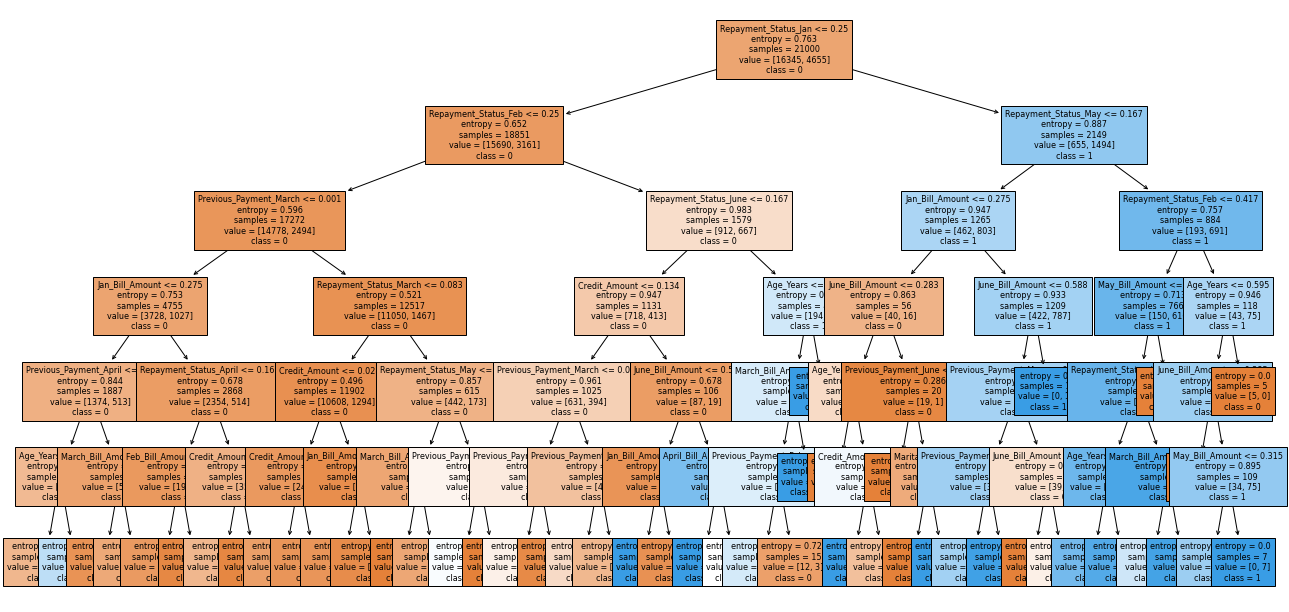

In [31]:
from sklearn.tree import plot_tree
plt.figure(figsize=(22,11))
plot_tree(model_building,fontsize=8,feature_names=x_train.columns,filled=True,class_names=['0','1']);
plt.show()

In [32]:
from sklearn.ensemble import RandomForestClassifier
model_defination=RandomForestClassifier(criterion='entropy',n_estimators=500,bootstrap=False,random_state=0)

In [33]:
model_building=model_defination.fit(x_train,y_train)

In [34]:
predict=model_building.predict(x_test)

In [35]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

         0.0       0.85      0.93      0.89      7019
         1.0       0.63      0.39      0.49      1981

    accuracy                           0.82      9000
   macro avg       0.74      0.66      0.69      9000
weighted avg       0.80      0.82      0.80      9000



In [36]:
#Even Randomforest couldnot improve the model since there is clear cut of class imbalance
Y.value_counts()

0.0    23364
1.0     6636
Name: Default_Payment, dtype: int64

In [38]:
#Using Smote techinque to get rid of class imbalance

from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy='minority')

X_sm,Y_sm=smote.fit_resample(X,Y)

In [40]:
Y_sm.value_counts()

1.0    23364
0.0    23364
Name: Default_Payment, dtype: int64

In [41]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X_sm,Y_sm,test_size=.30,random_state=0)

In [42]:
from sklearn.tree import DecisionTreeClassifier
model_defination=DecisionTreeClassifier(criterion='entropy',max_depth=6,random_state=0)

In [43]:
model_building=model_defination.fit(x_train,y_train)

In [44]:
predict=model_building.predict(x_test)

In [45]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

         0.0       0.72      0.79      0.75      6952
         1.0       0.77      0.69      0.73      7067

    accuracy                           0.74     14019
   macro avg       0.75      0.74      0.74     14019
weighted avg       0.75      0.74      0.74     14019



In [46]:
#there is some improvement in the model
#checking in randomforest
from sklearn.ensemble import RandomForestClassifier

model_defination=RandomForestClassifier(criterion='entropy',n_estimators=500,random_state=0,bootstrap=False)

In [47]:
model_building=model_defination.fit(x_train,y_train)

In [48]:
predict=model_building.predict(x_test)

In [49]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

         0.0       0.86      0.89      0.88      6952
         1.0       0.89      0.86      0.87      7067

    accuracy                           0.87     14019
   macro avg       0.87      0.87      0.87     14019
weighted avg       0.87      0.87      0.87     14019



In [ ]:
#by using RandomForest there is more improvement of 87%